# <center> Сегментация клиентов онлайн магазина подарков

## Постановка задачи


<center> <img src=https://salesupnow.ru/storage/app/media/pipeople.png align="right" width="300"/> </center>

Маркетинг — неотъемлемая часть любого бизнеса. Для повышения прибыли компании важно понимать своего клиента, его пожелания и предпочтения. С появлением электронной коммерции, или онлайн-продаж, стало намного проще собирать данные о клиентах, анализировать их, находить закономерности и реализовывать маркетинговые кампании.

Большинство интернет-магазинов используют инструменты веб-аналитики, чтобы отслеживать просмотры страниц, количество и поведение посетителей и коэффициент отказов. Но отчёта из Google Analytics или аналогичной системы может быть недостаточно для полного понимания того, как клиенты взаимодействуют с сайтом. Компаниям важно иметь возможность быстро и точно реагировать на перемены в поведении клиентов, создавая инструменты, которые обнаруживают эти изменения практически в режиме реального времени.

Машинное обучение помогает поисковой системе анализировать огромное количество данных о посетителях платформы, узнавать модели поведения профессиональных покупателей, определять категорию клиентов (например, лояльные/перспективные/новички/спящие/ушедшие) и выбирать правильную стратегию взаимодействия с ними.

Стоит также отметить, что компании, использующие машинное обучение на своих платформах электронной коммерции, могут постоянно повышать эффективность бизнес-процессов: настраивать товарную выборку персонально для каждого покупателя и предлагать выгодную цену в соответствии с бюджетом клиента и т. д. Эта задача относится к категории построения рекомендательных систем, речь о которых пойдёт в следующем разделе нашего курса.

> Как правило, наборы данных для электронной коммерции являются частной собственностью и, следовательно, их трудно найти среди общедоступных данных. Однако [The UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)  создал набор данных, содержащий фактические транзакции за 2010 и 2011 годы. С ним нам как раз и предлагается поработать в этом кейсе. 

> В нашем распоряжении будет набор данных, который содержит все транзакции, произошедшие в период с 01/12/2010 по 09/12/2011 для базирующейся в Великобритании компании, занимающейся онлайн-розничной торговлей. Компания в основном продает уникальные подарки на все случаи жизни. Многие клиенты компании являются оптовиками.


**Бизнес-задача:** произвести сегментацию существующих клиентов, проинтерпретировать эти сегменты и определить стратегию взаимодействия с ними.

**Техническая задача для вас как для специалиста в Data Science:** построить модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определить профиль каждого из кластеров.

**Основные цели проекта:**
1. Произвести предобработку исходного набора данных о транзакциях.
2. Провести разведывательный анализ данных и выявить основные закономерности.
3. Сформировать набор данных о характеристиках каждого из уникальных клиентов.
4. Построить несколько моделей машинного обучения, решающих задачу кластеризации клиентов, определить количество кластеров и проинтерпретировать их.
5. Спроектировать процесс предсказания категории интересов клиента и протестировать вашу модель на новых клиентах.




## Данные и их описание

Данные представляют собой таблицу в формате CSV, в каждой строке которой содержится информация об уникальной транзакции.

Признаки, описывающие каждую транзакцию:

* InvoiceNo — номер счёта-фактуры (уникальный номинальный шестизначный номер, присваиваемый каждой транзакции; буква "C" в начале кода указывает на отмену транзакции);
* StockCode — код товара (уникальное пятизначное целое число, присваиваемое каждому отдельному товару);
* Description — название товара;
* Quantity — количество каждого товара за транзакцию;
* InvoiceDate — дата и время выставления счёта/проведения транзакции;
* UnitPrice — цена за единицу товара в фунтах стерлингов;
* CustomerID — идентификатор клиента (уникальный пятизначный номер, однозначно присваиваемый каждому клиенту);
* Country — название страны, в которой проживает клиент.



Импорт базовых библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing

import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import warnings 

from IPython.display import display, HTML

warnings.filterwarnings("ignore")

plt.rcParams["patch.force_edgecolor"] = True

## 1. Знакомство со структурой данных

Первым делом необходимо понять, с какими данными предстоит работать, и произвести базовую предобработку данных — перевести признаки в необходимые для дальнейшей работы форматы.

Познакомьтесь с исходными данными поближе:

* Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
* Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
* Узнайте, из каких стран совершались транзакции.
* Исследуйте данные на наличие пропусков и дубликатов.
* Переведите столбцы в корректные форматы (например, даты в формат datetime).

In [2]:
url = 'https://lms-cdn.skillfactory.ru/assets/courseware/v1/468638e49cb9e7d4b4dfdc296c1c778e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/pj6_data.zip'
data = pd.read_csv(
    url, 
    encoding="ISO-8859-1", 
    dtype={'CustomerID': str,'InvoiceID': str}
)
print('Data shape: {}'.format(data.shape))
data.head(5)

Data shape: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [3]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print('Date interval {} to {}'.format(data['InvoiceDate'].dt.date.min(), data['InvoiceDate'].dt.date.max()))

Date interval 2010-12-01 to 2011-12-09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# Узнайте, сколько уникальных клиентов совершали транзакции в указанный период.
len(data['CustomerID'].unique())

4373

In [6]:
# Узнайте, из каких стран совершались транзакции.
data['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


В подавляющем большинстве покупки совершались из **United Kingdom**

In [7]:
# Исследуйте данные на наличие пропусков и дубликатов.

# % пропущенных значений
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

CustomerID     24.926694
Description     0.268311
dtype: float64

In [8]:
# поиск дубликатов
print(f'Число найденных дубликатов: {data[data.duplicated()].shape[0]}')

Число найденных дубликатов: 5268


In [9]:
# Проведите статистический анализ исходных данных, посмотрев на основные диапазоны исходных признаков.
data.describe()

,Quantity,InvoiceDate,UnitPrice
count,541909.000000,541909,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114
min,-80995.000000,2010-12-01 08:26:00,-11062.060000
25%,1.000000,2011-03-28 11:34:00,1.250000
50%,3.000000,2011-07-19 17:17:00,2.080000
75%,10.000000,2011-10-19 11:27:00,4.130000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,218.081158,NaN,96.759853


## 2. Преобразование, очистка и анализ данных

### 2.1. Преобразование и очистка данных о транзакциях

#### 2.1.1 Пропуски

Пропуски в столбце с идентификатором клиента (CustomerID) и описанием товара свидетельствуют о некорректных/незавершённых транзакциях. Удалите их из данных.

**Примечание.** Если посмотреть на распределение пропусков в столбцах Description и CustomerID, то можно заметить, что достаточно удалить строки, содержащие пропуски в столбце CustomerID, тогда пропуски в столбце Description удаляются автоматически.


In [10]:
data.dropna(subset=['CustomerID'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.9+ MB


#### 2.1.2. Дубликаты

Проверьте данные на наличие дубликатов. Удалите их из данных.


In [11]:
# поиск дубликатов
print(f'Число найденных дубликатов: {data[data.duplicated()].shape[0]}')

data = data.drop_duplicates()
data.info()

Число найденных дубликатов: 5225
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  object        
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.6+ MB


In [12]:
print(f'Число найденных дубликатов: {data[data.duplicated()].shape[0]}')

Число найденных дубликатов: 0


#### 2.1.3. Транзакции с отрицательным количеством товара

Из приведённых выше инсайтов о данных мы узнали все особенности отмены заказов. Когда мы будем сегментировать клиентов, мы будем определять их покупательскую способность. При расчёте покупательской способности нам будет очень важно учесть возвраты этого клиента.

Чтобы подсчитать количество возвратов, для начала нам надо определить, сколько уникальных товаров указано в транзакции (корзине) для каждой уникальной пары «клиент — заказ»:


In [13]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.head()

,CustomerID,InvoiceNo,Number of products
0,12346,541431,1
1,12346,C541433,1
2,12347,537626,31
3,12347,542237,29
4,12347,549222,24


**Примечание.** Более 16 % уникальных заказов являются возвратами. Интересный факт: если мы подсчитали количество транзакций, содержащих признак возврата, в изначальной таблице, где на каждый уникальный товар заведена отдельная строка, то мы получили бы, что количество возвратов менее 1 %. Однако это число было бы некорректным.

Создайте в ваших данных о транзакциях признак `QuantityCanceled`. Этот признак будет указывать на количество отменённого впоследствии товара для каждой транзакции, на которую найдётся противоположная ей транзакция с возвратом. Для транзакций, для которых не было возвратов, признак будет равен 0. Для транзакций, для которых указано отрицательное количество товара, но в данных отсутствует контрагент, признак будет пустым.

В качестве вспомогательного инструмента мы подготовили для вас функцию `get_quantity_canceled()`. Эта функция принимает на вход таблицу с транзакциями и возвращает объект `Series` — столбец, в котором указано количество отменённого впоследствии товара для каждой транзакции. Если транзакция не имеет контрагента, этот признак помечается как `NaN`.

Отметим, что эта функция не учитывает сложный случай, когда количество отменённого товара в транзакции-возврате больше, чем количество товара, которое указано в любой из отдельных транзакций на покупку (это случай, когда клиент сделал несколько заказов одного и того же товара, а потом оформил возврат на все товары разом). При желании вы можете самостоятельно модифицировать функцию для предобработки, чтобы учесть этот пограничный случай.

*Осторожно! Поиск отменённых транзакций занимает много времени из-за большого количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от мощности компьютера.*

In [14]:
def get_quantity_canceled(data):
    """Функция для создания признака количества отменённых заказов. 
    Функция принимает на вход таблицу и возвращает столбец, в котором указано количество отменённого впоследствии товара для кажой транзакции.
    Если транзакция с отрицательным количеством товара не имеет контрагента, данный признак помечается как NaN.

    Args:
        data (DataFrame): таблица с транзакциями

    Returns:
        Series: столбец с количеством отменённого товара
    """
    # Инициализируем нулями Series той же длины, что и столбцы таблицы.
    quantity_canceled = pd.Series(np.zeros(data.shape[0]), index=data.index)    
    negative_quantity = data[(data['Quantity'] < 0)].copy()
    for index, col in negative_quantity.iterrows():
        # Создаём DataFrame из всех контрагентов
        df_test = data[(data['CustomerID'] == col['CustomerID']) &
                       (data['StockCode']  == col['StockCode']) & 
                       (data['InvoiceDate'] < col['InvoiceDate']) & 
                       (data['Quantity'] > 0)].copy()
        # Транзация-возврат не имеет контрагента — ничего не делаем
        if (df_test.shape[0] == 0): 
            # Помечаем столбец как пропуск
            quantity_canceled.loc[index] = np.nan
        # Транзакция-возврат имеет ровно одного контрагента
        # Добавляем количество отменённого товара в столбец QuantityCanceled 
        elif (df_test.shape[0] == 1): 
            index_order = df_test.index[0]
            quantity_canceled.loc[index_order] = -col['Quantity']       
        # Транзакция-возврат имеет несколько контрагентов
        # Задаём количество отменённого товара в столбец QuantityCanceled для той транзакции на покупку,
        # в которой количество товара больше количества товаров в транзакции-возврате.
        elif (df_test.shape[0] > 1): 
            df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
            for ind, val in df_test.iterrows():
                if val['Quantity'] < -col['Quantity']: 
                    continue
                quantity_canceled.loc[ind] = -col['Quantity']
                break    
    return quantity_canceled

data['QuantityCanceled'] = get_quantity_canceled(data)

*Осторожно! Поиск отмененных транзакций занимает достаточно длительное время из-за количества строк в таблице. Выполнение следующего кода может занять до 20 минут в зависимости от компьютера.*

Узнайте, сколько транзакций в данных не имеют контрагентов, и, если их количество невелико, удалите их из данных.

Когда вы разобрались с возвратами, удалите транзакции с отрицательным количеством товара — они нам больше не нужны.



In [15]:
data = data[data['Quantity'] > 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         392732 non-null  object        
 1   StockCode         392732 non-null  object        
 2   Description       392732 non-null  object        
 3   Quantity          392732 non-null  int64         
 4   InvoiceDate       392732 non-null  datetime64[ns]
 5   UnitPrice         392732 non-null  float64       
 6   CustomerID        392732 non-null  object        
 7   Country           392732 non-null  object        
 8   QuantityCanceled  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.0+ MB


#### 2.1.4. Специализированные транзакции

Следующая задача — обработать специальные виды транзакций, которые обозначаются латинскими буквами.

В данных присутствует шесть специальных видов транзакций. С помощью регулярных выражений найдите такие коды товаров (StockCode), которые начинаются с латинских букв (при этом коды могут содержать цифры).

**Подсказка.** В качестве шаблона для поиска используйте строку '^[a-zA-Z]+'.

Чтобы понять, что означают эти коды, можно заглянуть в столбец с описанием (Description), например POST означает почтовые расходы, C2 — расходы на транспортировку, BANK CHARGES — банковские расходы.

Специальные операции не характеризуют покупательскую способность клиентов, так как не относятся напрямую к их покупкам, поэтому такие записи нам не нужны. Удалите все специальные транзакции из таблицы.

In [16]:
regex = r'^[a-zA-Z]+'

data = data[~data['StockCode'].str.contains(regex)]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391183 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391183 non-null  object        
 1   StockCode         391183 non-null  object        
 2   Description       391183 non-null  object        
 3   Quantity          391183 non-null  int64         
 4   InvoiceDate       391183 non-null  datetime64[ns]
 5   UnitPrice         391183 non-null  float64       
 6   CustomerID        391183 non-null  object        
 7   Country           391183 non-null  object        
 8   QuantityCanceled  391183 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB


#### 2.1.5. Транзакции с товарами без стоимости

При просмотре описательных статистик можно заметить, что на некоторые товары установлена цена в 0 фунтов стерлингов. Таких транзакций оказывается менее 1 % — можно удалить их.

In [18]:
data = data[data['UnitPrice'] > 0]

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391150 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   InvoiceNo         391150 non-null  object        
 1   StockCode         391150 non-null  object        
 2   Description       391150 non-null  object        
 3   Quantity          391150 non-null  int64         
 4   InvoiceDate       391150 non-null  datetime64[ns]
 5   UnitPrice         391150 non-null  float64       
 6   CustomerID        391150 non-null  object        
 7   Country           391150 non-null  object        
 8   QuantityCanceled  391150 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 29.8+ MB


#### 2.1.6. Общая стоимость товаров в транзакции

Добавьте в ваш датасет общую цену заказа (TotalPrice). Она рассчитывается как:
 
 **общая цена = цена за единицу товара * (количество товаров в заказе - количество возвращённых товаров).**

Этот признак впоследствии поможет вам рассчитать покупательскую способность каждого из клиентов.

In [20]:
data['TotalPrice'] = data['UnitPrice'] * (data['Quantity'] - data['QuantityCanceled'])

Помимо рекомендованных преобразований, вы также можете придумать собственные и применить их к исходным данным.
После завершения предобработки сохраните результат очищения данных в отдельный файл, чтобы впоследствии вам не приходилось повторять эти действия.


In [21]:
# сохраним результаты преобразований в файл
data.to_csv('data/customer_segmentation.zip', compression='zip', index=False)

Завершили преобразования, сохранили файл, для дальнейшего использования.

### 2.2. Разведывательный анализ

После предобработки исходных данных произведите разведывательный анализ и исследуйте транзакции, ответив на следующие вопросы:

* Клиенты из каких стран покупают больше и чаще?
* Какие страны приносят наибольшую сезонную выручку?
* Присутствует ли в продажах сезонность (когда покупают чаще)?
* Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
* Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

**Примечание.** Вы можете сформулировать и другие вопросы. Главная цель — извлечь максимум понятной информации из исходных данных.

Свои рассуждения сопроводите графиками и диаграммами.



In [22]:
data = pd.read_csv('data/customer_segmentation.zip')
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0.0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0.0,20.34


In [23]:
# Клиенты из каких стран покупают больше и чаще?

# по количеству заказов
# data['Country'].value_counts()
data.groupby(['Country'])['Country'].count().sort_values(ascending=False)

Country
United Kingdom          348872
Germany                   8643
France                    8019
EIRE                      7126
Spain                     2417
Netherlands               2322
Belgium                   1935
Switzerland               1810
Portugal                  1416
Australia                 1180
Norway                    1048
Channel Islands            743
Italy                      741
Finland                    647
Cyprus                     601
Sweden                     427
Austria                    384
Denmark                    367
Poland                     325
Japan                      321
Israel                     245
Unspecified                241
Singapore                  215
Iceland                    182
USA                        179
Canada                     150
Greece                     142
Malta                      109
United Arab Emirates        67
European Community          57
RSA                         57
Lebanon                     45


In [24]:
# по сумме заказов.
data.groupby(['Country'])['TotalPrice'].sum().sort_values(ascending=False)

Country
United Kingdom          6797691.44
Netherlands              283443.54
EIRE                     247074.57
Germany                  201520.71
France                   181529.63
Australia                136950.25
Switzerland               51863.75
Spain                     51764.90
Belgium                   36673.04
Sweden                    36362.91
Japan                     35420.56
Norway                    32292.96
Portugal                  26500.65
Channel Islands           19930.64
Finland                   18303.54
Denmark                   18042.14
Italy                     15337.04
Cyprus                    12801.26
Singapore                  9120.39
Austria                    8720.98
Israel                     7215.84
Poland                     6853.14
Greece                     4425.52
Iceland                    4310.00
Canada                     3115.44
Unspecified                2660.77
Malta                      2011.28
United Arab Emirates       1864.78
USA         

Больше всего заказов и по количеству и по сумме поступает из United Kingdom. Так же в пятерку стран по сумме заказов входят: Netherlands, EIRE, Germany, France. Однако даже их общая сумма заказов более чем в 7 раз меньше суммы заказов лидера.

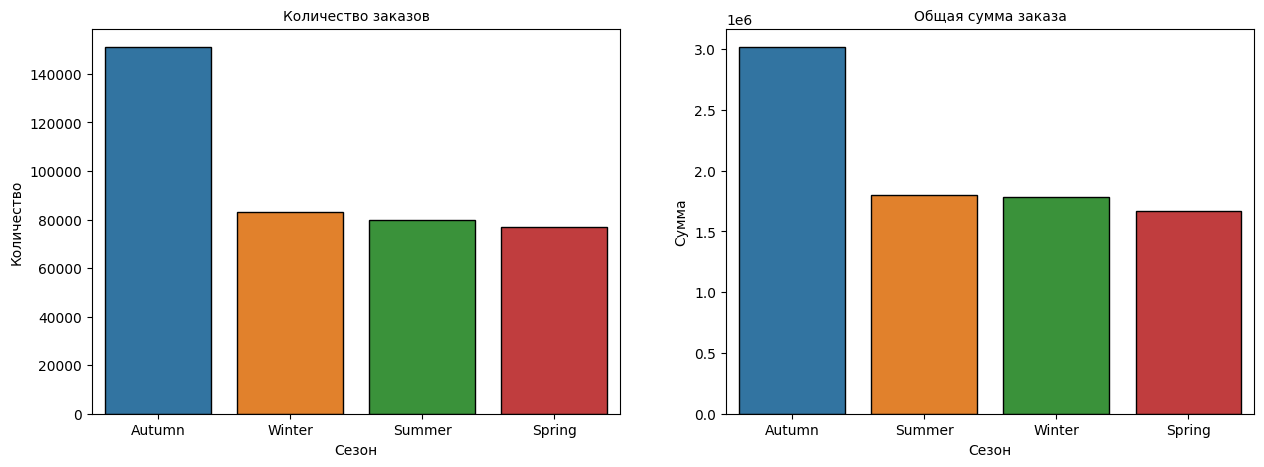

In [25]:
# Присутствует ли в продажах сезонность (когда покупают чаще)?

# добавим признак сезона
    
# выделим месяц из даты
data['month'] = data['InvoiceDate'].dt.month

# преобразуем месяц в сезон
def season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

data['Season'] = data['month'].apply(season)

# удаляем лишнее
data = data.drop(columns=['month'])

# готовим данные
gr1 = data['Season'].value_counts()
gr1 = pd.DataFrame(gr1)
gr1.reset_index(inplace=True) 

gr2 = data.groupby(['Season'])['TotalPrice'].sum().sort_values(ascending=False)
gr2 = pd.DataFrame(gr2)
gr2.reset_index(inplace=True) 

# строим график
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].set_title('Количество заказов', fontsize=10)
axes[1].set_title('Общая сумма заказа', fontsize=10)

sns.barplot(gr1, x='Season', y='count', ax=axes[0], errorbar=None)
sns.barplot(gr2, x='Season', y='TotalPrice', ax=axes[1], errorbar=None)

axes[0].set(ylabel='Количество', xlabel='Сезон')
axes[1].set(ylabel='Сумма', xlabel='Сезон');


Исходя из представленных графиков, мы видим сезонность в продажах. Ярко выражено, что осенью заказов и по количеству и по сумме больше.

In [26]:
# Какие страны приносят наибольшую сезонную выручку?

# возьмем 10 первых стран по выручке в "горячий" сезон
gr1 = data[data['Season'] == 'Autumn'].groupby(by=['Country'])['TotalPrice'].sum().sort_values(ascending=False)[:10]
gr1

Country
United Kingdom    2517861.18
Netherlands         92850.92
EIRE                91008.17
France              73705.11
Germany             67680.29
Australia           29424.98
Switzerland         22260.86
Norway              17523.17
Spain               16700.28
Belgium             14464.46
Name: TotalPrice, dtype: float64

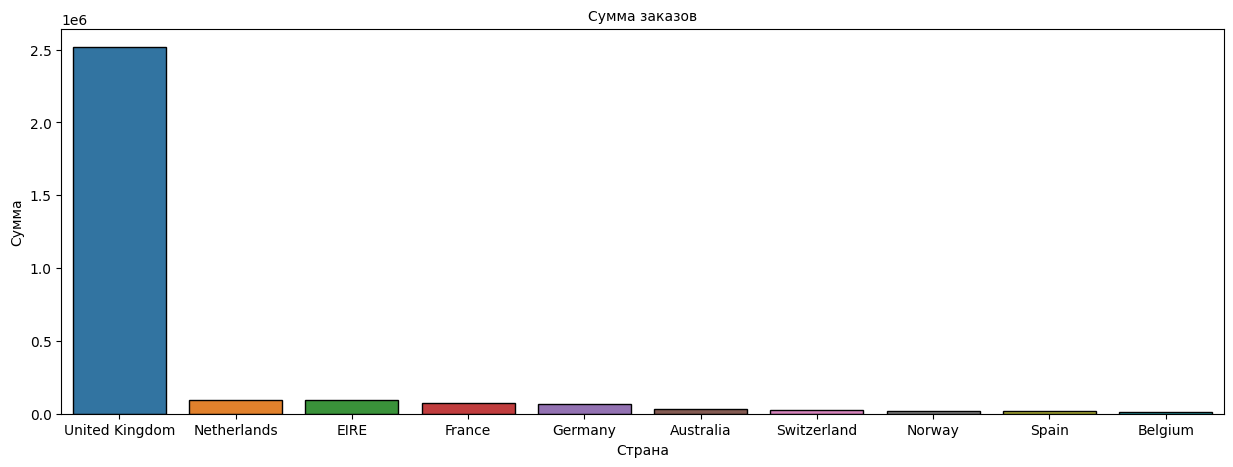

In [27]:
# построим график
gr1 = pd.DataFrame(gr1)
gr1.reset_index(inplace=True) 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
axes.set_title('Сумма заказов', fontsize=10)
sns.barplot(gr1, x='Country', y='TotalPrice', errorbar=None)
axes.set(ylabel='Сумма', xlabel='Страна');

Самый большой вклад даёт United Kingdom

In [28]:
# Сгруппируйте данные по датам и часам совершения транзакции и найдите количество заказов на каждый день-час. 
gr1 = data.groupby(by=[data['InvoiceDate'], data['InvoiceDate'].dt.hour])['InvoiceNo'].count()
gr1

InvoiceDate          InvoiceDate
2010-12-01 08:26:00  8               7
2010-12-01 08:28:00  8               2
2010-12-01 08:34:00  8              16
2010-12-01 08:35:00  8               1
2010-12-01 08:45:00  8              19
                                    ..
2011-12-09 12:23:00  12              2
2011-12-09 12:25:00  12              2
2011-12-09 12:31:00  12             21
2011-12-09 12:49:00  12              4
2011-12-09 12:50:00  12             15
Name: InvoiceNo, Length: 17166, dtype: int64

In [29]:
# Затем найдите среднее количество ежедневно поступающих заказов в каждый из часов.
# Каково распределение среднего количества ежедневно поступающих заказов по времени суток (часу совершения транзакции)? 

# преобразуем Series в DataFrame
gr1 = pd.DataFrame(gr1)
gr1.index.names = ['date', 'hour']
gr1.reset_index(inplace=True) 
gr1 = gr1.rename(columns={'InvoiceNo': 'number of orders'})

# Выводим необходимую информацию
gr1.groupby(by=['hour'])['number of orders'].mean()

hour
6      1.000000
7     12.931034
8     16.119626
9     16.682236
10    18.294204
11    22.793853
12    24.795231
13    26.068908
14    25.530318
15    23.419948
16    22.982490
17    24.288136
18    17.585366
19    22.739437
20    43.166667
Name: number of orders, dtype: float64

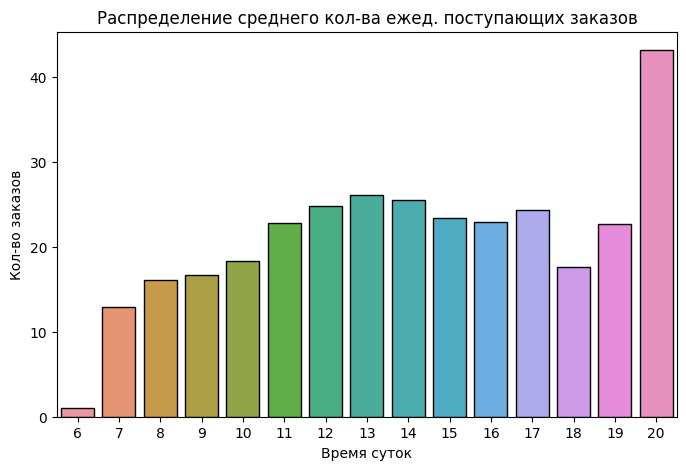

In [30]:
# построим график
fig, axes = plt.subplots(1, 1, figsize=(8, 5))

sns.barplot(gr1, x='hour', y='number of orders', errorbar=None)
axes.set(xlabel='Время суток', ylabel='Кол-во заказов')
axes.set_title('Распределение среднего кол-ва ежед. поступающих заказов');

Из графика видно, что наибольшее число заказов в среднем приходится на 8 часов вечера. А после 8 вечера и до 6 утра заказов нет.

### 2.3. Построение RFM-таблицы и поиск RFM-выбросов

Мы добрались до самой интересной части нашей задачи. Нам предстоит сформировать признаки, на основе которых мы будем производить сегментацию клиентов.

Для этого давайте познакомимся с очень популярным методом для анализа потребительской ценности под названием RFM. 

<img src=https://lms-cdn.skillfactory.ru/assets/courseware/v1/e44087873a88167cdc50208b74979f8b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_PJ_6_2_5.png width="500">

Метод заключается в группировке клиентов на основе следующих параметров:
* Recency (Давность) — давность последней покупки клиента;
* Frequency (Частота) — общее количество покупок клиента;
* Monetary Value (Денежная ценность) — сколько денег потратил клиент.


Суть RFM-анализа состоит в том, что мы разделяем всех клиентов на группы в зависимости от того, как давно они сделали последнюю покупку, как часто покупали и насколько большой была сумма их заказов. 

Например, вот так может выглядеть интерпретация кластеров для случая RF-сегментации (анализа на основе давности и частоты заказов клиента):

<img src=https://retailrocket.ru/wp-content/uploads/2017/06/rfm-1.png>

Задача маркетологов — вести клиента в зону лояльных.

Мы можем рассчитать RFM-характеристики для каждого из клиентов в нашем датасете и на их основе с помощью методов кластеризации построить подобные сегменты клиентов, привязанные к нашим данным.

Чтобы получить RFM-таблицу, нам необходимо сгруппировать данные по идентификаторам клиента и рассчитать следующие  агрегированные характеристики:

* Recency для i-го клиента рассчитывается как разница между датой и временем последнего заказа и точкой отсчёта, переведённая в дни:
    $$t_0-max(t_{i1}, t_{i2},..., t_{iM})$$

    где $t_{ij}$ — дата и время совершения i-ым клиентом своей j-ой покупки.

    В качестве точки отсчёта $t_0$ берём дату на один день «старше», чем все наши данные. Это будет 10 декабря 2011 года (в формате datetime — '2011-12-10 00:00:00').

* Frequency рассчитывается как общее количество уникальных заказов, которые совершил i-ый клиент.
* Monetary Value рассчитывается как общая сумма денег, которую i-ый клиент потратил на наши товары (с учётом возвратов).

Когда вы рассчитаете все характеристики, не забудьте дать столбцам результирующей таблицы соответствующие названия.

In [31]:
from datetime import datetime
from datetime import timedelta

# точка отсчета
#reference_point = datetime.fromisoformat('2011-12-10 00:00:00')
dt = data['InvoiceDate'].max().date() + timedelta(1)
reference_point = datetime(dt.year, dt.month, dt.day)

# готовим RFM таблицу
rfm_table = pd.DataFrame(index=data['CustomerID'].unique())
rfm_table.index.name = 'CustomerID'
rfm_table['tmp_id'] = rfm_table.index
rfm_table['Recency'] = rfm_table['tmp_id'].apply(lambda x: (reference_point - data[data['CustomerID'] == x]['InvoiceDate'].max()).days)
rfm_table['Frequency'] = rfm_table['tmp_id'].apply(lambda x: len(data[data['CustomerID'] == x]['InvoiceNo'].unique()))
rfm_table['Monetary'] = rfm_table['tmp_id'].apply(lambda x: data[data['CustomerID'] == x]['TotalPrice'].sum())
rfm_table = rfm_table.drop(columns=['tmp_id'])

# посмотрим, что получилось
rfm_table.info()
display(rfm_table.head())

<class 'pandas.core.frame.DataFrame'>
Index: 4334 entries, 17850 to 12713
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4334 non-null   int64  
 1   Frequency  4334 non-null   int64  
 2   Monetary   4334 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.4 KB


,Recency,Frequency,Monetary
CustomerID,,,
17850,372,34,5322.84
13047,56,9,3095.80
12583,2,15,6629.34
13748,95,5,948.25
15100,333,3,635.10


После того как вы подготовите RFM-таблицу, визуализируйте каждую из трёх компонент, например, в виде коробчатых диаграмм (boxplot). Вы получите примерно следующие результаты (графики могут отличаться в зависимости от того, как вы выполните предобработку данных):

In [32]:
boxes = [px.box(rfm_table, x=column) for column in rfm_table.columns]
fig = make_subplots(
    rows=1, cols=3, 
    subplot_titles=(
        "Recency", "Frequency", "Monetary"
    )
)

for i, box in enumerate(boxes):
    fig.add_trace(boxes[i]['data'][0], row=1, col=i+1)

fig.update_layout(showlegend=True)
#fig.write_html('plotly/boxplot_1.html')
#fig.show()

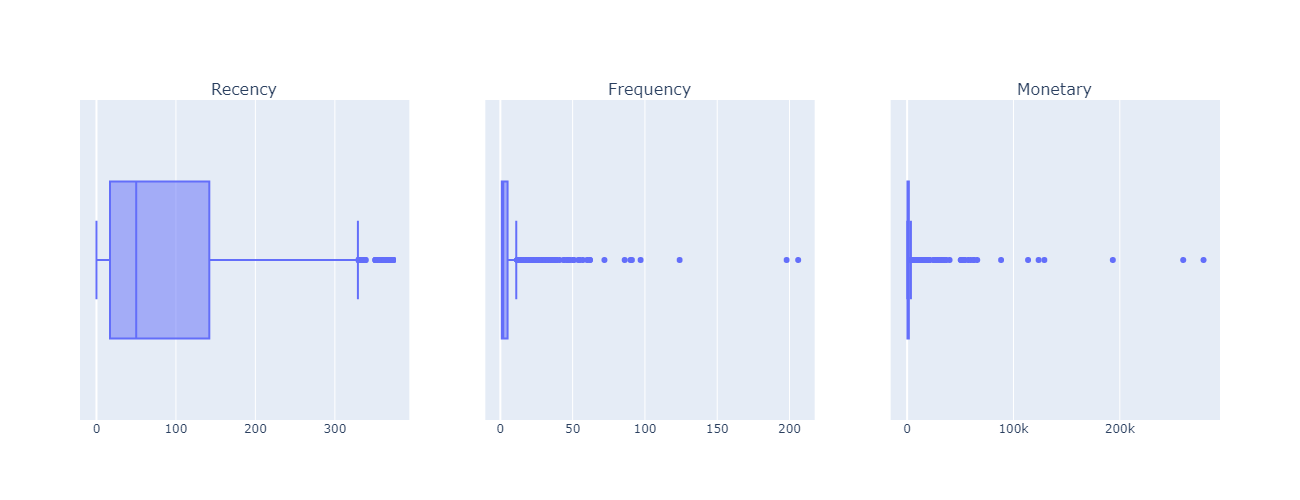

In [33]:
# Выведем график в статичном формате, для того, чтобы можно было смотреть на github
import kaleido
fig.show(renderer="png", width=1300)

Что интересного здесь можно увидеть? Есть клиенты с аномально большим количеством сделанных заказов (более 100 штук), а также клиенты, общая стоимость заказов которых превышает 190 тысяч фунтов стерлингов.

Чем это плохо? Выбросы могут отрицательно сказаться на результатах работы методов кластеризации, неустойчивых к ним, например алгоритма KMeans, поэтому хотелось бы от них избавиться. Однако терять много ценных данных о клиентах тоже не хочется, поэтому ограничимся верхней границей соответствующей квантили уровня 0.95. Таким образом, мы удалим данные тех клиентов, для которых значение параметра Frequency или параметра Monetary выше, чем у 95 % клиентов.


In [34]:
frequency_quantile = rfm_table['Frequency'].quantile(0.95)
monetary_quantile = rfm_table['Monetary'].quantile(0.95)

rfm_table = rfm_table[rfm_table['Frequency'] <= frequency_quantile]
rfm_table = rfm_table[rfm_table['Monetary'] <= monetary_quantile]

## 3. Моделирование и оценка качества моделей

### 3.1. Кластеризация на основе RFM-характеристик

Чтобы результаты кластеризации было удобнее интерпретировать, вы можете уменьшить размерность исходных признаков до двух компонент.

**Подсказка.** Чтобы методы понижения размерности работали стабильно, данные необходимо стандартизировать/нормализовать. Для удобства оберните эти шаги по предобработке данных в pipeline.

Произведите предобработку исходных данных. На основе RFM-признаков кластеризуйте клиентов онлайн-магазина подарков с помощью известных вам методов (используйте минимум три метода).

Подберите оптимальное количество кластеров для выбранных методов с помощью коэффициента силуэта, перебирая возможные значения от 3 до 10 включительно (большее или меньшее количество кластеров будет нерелеватно для маркетинга). 

Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# стандартизируем и уменьшаем размерность
pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=2))])
rfm_scaler = pipeline.fit_transform(rfm_table)


## K-Means

,silhouette,cluster
0,0.52423,3


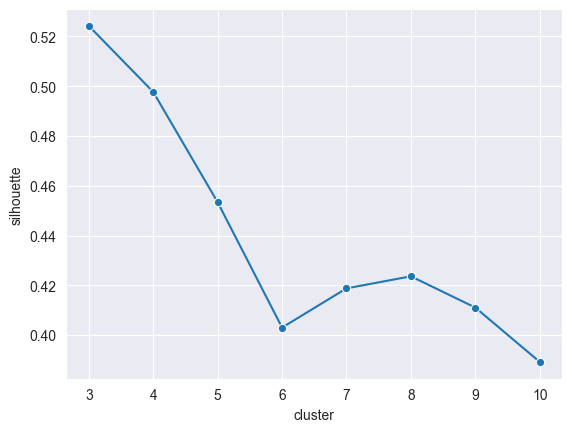

In [36]:
from sklearn.cluster import KMeans

# функция подсчета метрики
def get_silhouette_km(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init='auto', random_state=42)
    k_means.fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим словарь
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette_km(cluster_num, rfm_scaler))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_km = pd.DataFrame(silhouette_res)

#выведем максимальное значение метрики и количество кластеров
display(silhouette_km[silhouette_km['silhouette'] == silhouette_km['silhouette'].max()])
# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_km, x="cluster", y="silhouette", marker= "o");

## EM-алгоритм

,silhouette,cluster
0,0.436061,3


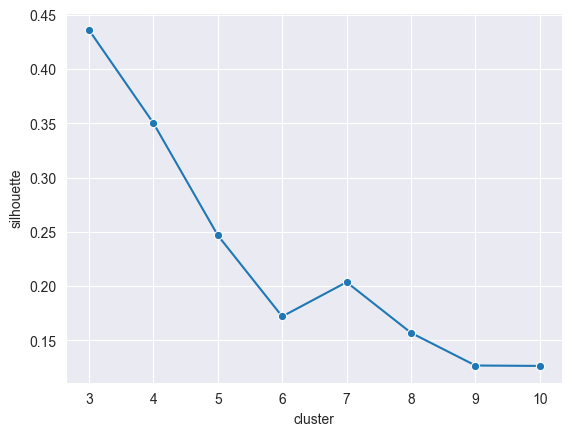

In [37]:
from sklearn.mixture import GaussianMixture

# функция подсчета метрики
def get_silhouette_em(cluster_num, X):
    gm = GaussianMixture(n_components=cluster_num, random_state=42)
    gm.fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, gm.predict(X))
    return silhouette

# создадим словарь
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette_em(cluster_num, rfm_scaler))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_em = pd.DataFrame(silhouette_res)

#выведем максимальное значение метрики и количество кластеров
display(silhouette_em[silhouette_em['silhouette'] == silhouette_em['silhouette'].max()])
# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_em, x="cluster", y="silhouette", marker= "o");

## Агломеративная иерархическая кластеризация

,silhouette,cluster
0,0.496759,3


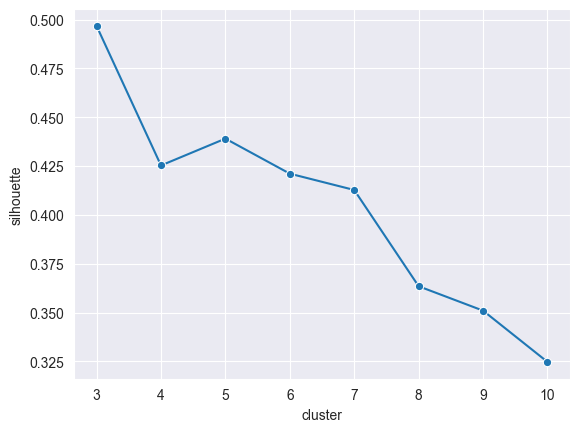

In [38]:
from sklearn.cluster import AgglomerativeClustering

# функция подсчета метрики
def get_silhouette_agg(cluster_num, X):
    agg = AgglomerativeClustering(n_clusters=cluster_num)
    #agg.fit(X)
    # подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, agg.fit_predict(X))
    return silhouette

# создадим словарь
silhouette_res = {"silhouette": [], "cluster": []}

for cluster_num in range(3, 11):
    silhouette_res["silhouette"].append(get_silhouette_agg(cluster_num, rfm_scaler))
    silhouette_res["cluster"].append(cluster_num)
    
# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_agg = pd.DataFrame(silhouette_res)

#выведем максимальное значение метрики и количество кластеров
display(silhouette_agg[silhouette_agg['silhouette'] == silhouette_agg['silhouette'].max()])
# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_agg, x="cluster", y="silhouette", marker= "o");

Все три алгоритма кластеризации показали наибольшее значение коэффициента силуэта при количестве кластеров равном 3. Однако наибольшее значение 0.52423, показал K-Means. Его и будем использовать. 

In [39]:
# Выберите алгоритм с наибольшим коэффициентом силуэта, сделайте предсказание меток кластеров.

k_means =  KMeans(n_clusters=3, init='k-means++', n_init='auto', random_state=42)
clusters = k_means.fit_predict(rfm_scaler)

# добавим значение кластера в исходный датасет
rfm_table['Clusters'] = clusters

In [40]:
# посмотрим предварительно
for i in range(3):
    print('Кластер:', i)
    display(rfm_table[rfm_table['Clusters'] == i].drop(columns=['Clusters']).describe())

Кластер: 0


,Recency,Frequency,Monetary
count,999.000000,999.000000,999.000000
mean,253.474474,1.403403,386.277297
std,64.517766,0.766553,369.212757
min,141.000000,1.000000,0.000000
25%,198.000000,1.000000,157.550000
50%,249.000000,1.000000,292.470000
75%,304.000000,2.000000,459.995000
max,373.000000,6.000000,3202.920000


Кластер: 1


,Recency,Frequency,Monetary
count,2269.000000,2269.000000,2269.000000
mean,51.221684,2.329220,660.068947
std,39.896546,1.308477,467.352255
min,0.000000,1.000000,0.000000
25%,19.000000,1.000000,297.070000
50%,42.000000,2.000000,557.620000
75%,74.000000,3.000000,928.760000
max,189.000000,7.000000,2601.550000


Кластер: 2


,Recency,Frequency,Monetary
count,776.000000,776.000000,776.000000
mean,31.943299,7.068299,2657.746997
std,38.161212,2.586661,1041.360411
min,0.000000,1.000000,515.730000
25%,8.000000,5.000000,1860.847500
50%,18.000000,7.000000,2490.945000
75%,42.000000,9.000000,3299.882500
max,306.000000,13.000000,5657.850000


### 3.2. Интерпретация результатов кластеризации

Перейдём к интерпретации полученных кластеров.

#### 3.2.1. Визуализация кластеров

Визуализируйте результаты в виде 3D-диаграммы с осями Recency, Frequency и Monetary. Проанализируйте полученную диаграмму и попробуйте понять, какие кластеры у вас получились.

In [41]:
#строим график
fig = px.scatter_3d(
    data_frame=rfm_table,
    x = 'Recency',
    y = 'Frequency',
    z = 'Monetary',
    color='Clusters',
    width=1000,
    height=700
)

#отображаем его
#fig.show()
#fig.write_html("plotly/scatter_3d.html")


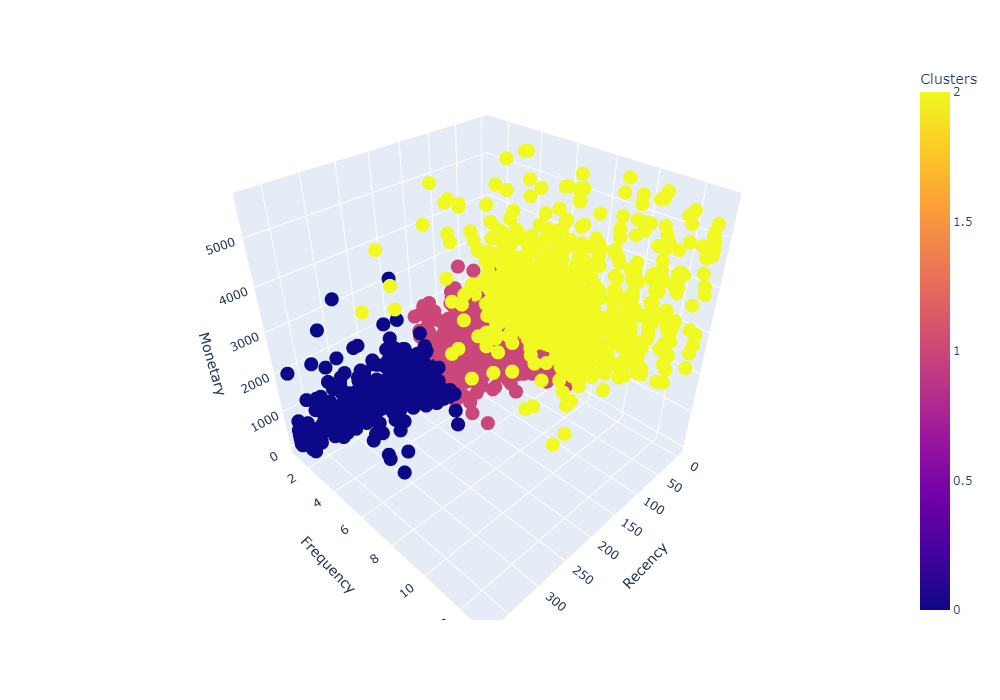

In [42]:
# Выведем график в статичном формате, для того, чтобы можно было смотреть на github

fig.show(renderer="png", width=1000)

Из графика видно хорошее разделение по кластерам.  
Так в кластер 0 сгруппированны клиенты совершившие покупку давно, на небольшую сумму и число покупок невелико.  
В кластер 1 попали клиенты, которые так же совершили небольшое количество покупок на небольшую сумму, но заказ был сделан недавно.  
Ну, а в кластере 2 оказались самые выгодные клиенты. Заказов много, на большие суммы и сделаны они недавно.


#### 3.2.2. Построение профиля кластеров

Далее составьте так называемый профиль кластеров. Для этого вам необходимо вернуться от декомпозированных данных (если вы производили понижение размерности) к RFM-таблице (очищенной от выбросов).

Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.

Чтобы результаты было проще интерпретировать, давайте познакомимся с одним из способов визуализации профиля кластеров — **Radar Chart** (полярная диаграмма, или диаграмма паутины). Это графическое представление значений нескольких эквивалентных категорий в форме паутины.

Radar Chart часто используется при определении профиля кластеров. На концах паутины откладываются оси, соответствующие признакам, описывающим объекты. На каждой из осей для каждого кластера откладываются средние значения соответствующих характеристик. Соединив точки по осям, мы получаем многоугольник. 

Пример полярной диаграммы для задачи кластеризации учеников по интересам:

<img src=https://www.datanovia.com/en/wp-content/uploads/2020/12/radar-chart-in-r-customized-fmstb-radar-chart-1.png width=500>

На этой диаграмме мы видим визуализацию признаков для одного из кластеров. Видно, что ученики, принадлежащие этому кластеру, в большей степени увлекаются музыкой (Music), а в меньшей — программированием (Programm).

В модуле `graph_objects` библиотеки `plotly` есть встроенная функция `Scatterpolar`, которая позволяет построить полярную диаграмму. На основе этой функции мы подготовили для вас функцию `plot_cluster_profile()`, которая позволяет визуализировать профиль каждого из кластеров в виде полярной диаграммы. У неё есть два параметра: `grouped_data` — сгруппированные по кластерам характеристики объектов (клиентов), `n_clusters` — количество кластеров.

Главное условие использования полярной диаграммы — все признаки должны быть приведены к единому масштабу с помощью нормализации, где 1 будет означать максимум, а 0 — минимум. Шаг с нормализацией мы также добавили в функцию `plot_cluster_profile()`.


In [43]:
def plot_cluster_profile(grouped_data, n_clusters):
    """Функция для визуализации профиля кластеров в виде полярной диаграммы.

    Args:
        grouped_data (DataFrame): таблица, сгруппированная по номерам кластеров с агрегированными характеристиками объектов.
        n_clusters (int): количество кластеров
    """
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = preprocessing.MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаём список признаков
    features = grouped_data.columns
    # Создаём пустую фигуру
    fig = go.Figure()
    # В цикле визуализируем полярную диаграмму для каждого кластера
    for i in range(n_clusters):
        # Создаём полярную диаграмму и добавляем её на общий график
        fig.add_trace(go.Scatterpolar(
            r=grouped_data.iloc[i].values, # радиусы
            theta=features, # название засечек
            fill='toself', # заливка многоугольника цветом
            name=f'Cluster {i}', # название — номер кластера
        ))
    # Обновляем параметры фигуры
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=800, # ширина (в пикселях)
        height=800, # высота (в пикселях)
    )
    # Отображаем фигуру
    #fig.show()
    # Выведем график в статичном формате, для того, чтобы можно было смотреть на github
    fig.show(renderer="png", width=800)
    #fig.write_html("plotly/scatterpolar.html")
    

Теперь у вас есть удобный инструмент для анализа профиля кластеров. Воспользуйтесь им, чтобы проинтерпретировать результаты, полученные на предыдущем шаге.

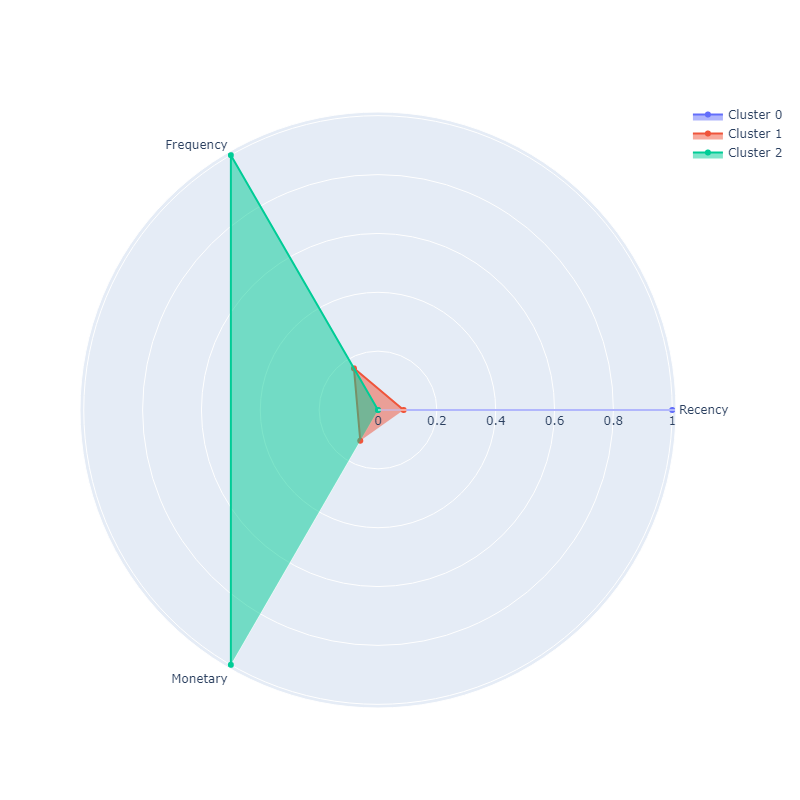

In [44]:
# Сгруппируйте RFM-таблицу по полученным кластерам и рассчитайте среднее по каждому из признаков.
gr1 = rfm_table.groupby(by=['Clusters']).mean()
plot_cluster_profile(gr1, 3)


Полярная диаграмма подтверждает выводы, которые мы сделали в результате анализа 3D-диаграммы.  

## 5. Выводы и оформление работы

Напишите заключение о проделанной работе и полученных результатах. Отметьте, какие сегменты клиентов вам удалось найти в данных.

После завершения проекта создайте в своём репозитории файл README.md и кратко опишите содержимое проекта по принципу, который мы приводили ранее.

Выложите свой проект на GitHub и оформите удалённый репозиторий, добавив в него описание и теги репозитория (теги придумайте самостоятельно в зависимости от того, какую задачу вы решали).

В результате проделанной работы, мы построили модель кластеризации клиентов на основе их покупательской способности, частоты заказов и срока давности последней покупки, определили профиль каждого из кластеров.

Нам удалось найти 3 сегмента клиентов.
- клиенты совершившие покупку давно, на небольшую сумму и число покупок невелико.  
- клиенты, которые так же совершили небольшое количество покупок на небольшую сумму, но заказ был сделан недавно.  
- и самые выгодные клиенты. Заказов много, на большие суммы и сделаны они недавно.

Используя построенную модель, маркетологи, смогут выбрать правильную стратегию взаимодействия с покупателями и увеличить прибыль компании.